### Collaborate with B153730

### Jupyter Notebook source file in https://github.com/B153665-2019/PSB-Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from scipy.optimize import fsolve

### Define the differential function of the switch:

In [38]:
# define the model of MPF bistable switch (modified), input MPF as y.
def switch(y, t, Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
    θc = 2
    θw = 2
    
    # Total number of phosphorylation sites on Cdc25/Wee1.
    nc = 5
    nw = 5
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt    

### Plot MPF Trajectory with different CycT:

In [4]:
scenarios = [0.6,0.9]

time = np.linspace(0, 20, 1000)

initial_conditions = [.08, .1,.13,.15,.2,.3,.4]

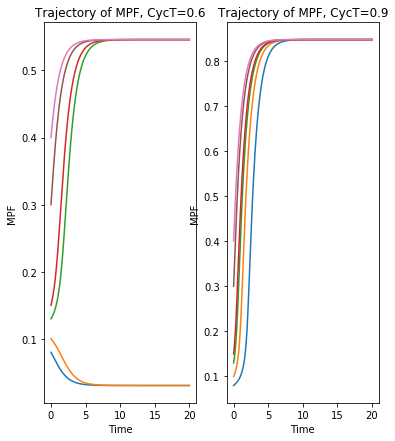

In [5]:
#ignore divided by 0 error
np.seterr(divide='ignore', invalid='ignore')

plt.figure(figsize=(6,7))

#plot the MPF Trajectory when CycT=0.6
#Set several initial typical conditions
plt.subplot(1,2,1)
for init in initial_conditions:
    plt.plot(time,odeint(switch,init,time,args=(scenarios[0],)))
plt.title(r'Trajectory of MPF, CycT=0.6')
plt.xlabel('Time')
plt.ylabel('MPF')



#plot the MPF Trajectory when CycT=0.9
#Set several initial typical conditions
plt.subplot(1,2,2)
for init in initial_conditions:
    plt.plot(time,odeint(switch,init,time,args=(scenarios[1],)))
plt.title(r'Trajectory of MPF, CycT=0.9')
plt.xlabel('Time')
plt.ylabel('MPF')

plt.show()


### One-parameter bifurcation diagram:

In [40]:
# define the model of MPF bistable switch (modified), input MPF as y.
def as_switch(y,Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
    θc = 2
    θw = 2
    
    # Total number of phosphorylation sites on Cdc25/Wee1.
    nc = 5
    nw = 5
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt   

In [41]:
# define the model of MPF bistable switch (modified), input MPF as y.
def switch_NPCdc25(y, t, Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
    θc = 0
    θw = 2
    
    # Total number of phosphorylation sites on Cdc25/Wee1.
    nc = 0
    nw = 5
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt

In [42]:
# define the model of MPF bistable switch (modified), input MPF as y.
def switch_NPWee1(y, t, Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
    θc = 2
    θw = 0
    
    # Total number of phosphorylation sites on Cdc25/Wee1.
    nc = 5
    nw = 0
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt

In [43]:
# define the model of MPF bistable switch (modified), input MPF as y.
def switch_PMCdc25(y, t, Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
    θc = -1
    θw = 2
    
    # Total number of phosphorylation sites on Cdc25/Wee1.
    nc = 0
    nw = 5
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt

In [44]:
# define the model of MPF bistable switch (modified), input MPF as y.
def switch_PMWee1(y, t, Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
    θc = 2
    θw = -1
    
    # Total number of phosphorylation sites on Cdc25/Wee1.
    nc = 5
    nw = 0
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt

### Nonphosphorylatable Mutation Plot:

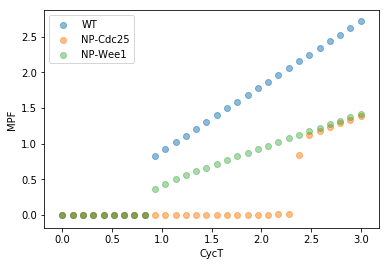

In [48]:
t_x = np.linspace(0,50,50)
Cyct_x=np.linspace(0,3,30)
mpf_plot=[]
for x in Cyct_x:
    if x == Cyct_x[0]:
        mpf=odeint(switch,0,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
    else:
        mpf=odeint(switch,mpf,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
plt.scatter(Cyct_x,mpf_plot,alpha=0.5,label='WT')

mpf_plot=[]
for x in Cyct_x:
    if x == Cyct_x[0]:
        mpf=odeint(switch_NPCdc25,0,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
    else:
        mpf=odeint(switch_NPCdc25,mpf,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])

plt.scatter(Cyct_x,mpf_plot,alpha=0.5,label='NP-Cdc25')

mpf_plot=[]
for x in Cyct_x:
    if x == Cyct_x[0]:
        mpf=odeint(switch_NPWee1,0,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
    else:
        mpf=odeint(switch_NPWee1,mpf,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])

plt.scatter(Cyct_x,mpf_plot,alpha=0.4,label='NP-Wee1')
plt.xlabel('CycT')
plt.ylabel('MPF')
plt.legend(loc='upper left')
plt.show()

### Phosphor-mimetic Mutation Plot:

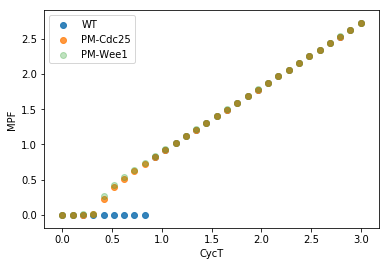

In [46]:
t_x = np.linspace(0,50,50)
Cyct_x=np.linspace(0,3,30)
mpf_plot=[]
for x in Cyct_x:
    if x == Cyct_x[0]:
        mpf=odeint(switch,0,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
    else:
        mpf=odeint(switch,mpf,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
plt.scatter(Cyct_x,mpf_plot,alpha=0.9,label='WT')

mpf_plot=[]
for x in Cyct_x:
    if x == Cyct_x[0]:
        mpf=odeint(switch_NPCdc25,0,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
    else:
        mpf=odeint(switch_PMCdc25,mpf,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])

plt.scatter(Cyct_x,mpf_plot,alpha=0.8,label='PM-Cdc25')

mpf_plot=[]
for x in Cyct_x:
    if x == Cyct_x[0]:
        mpf=odeint(switch_NPWee1,0,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])
    else:
        mpf=odeint(switch_PMWee1,mpf,t_x,args=(x,))[-1]
        mpf_plot.append(fsolve(as_switch,x,mpf)[0])

plt.scatter(Cyct_x,mpf_plot,alpha=0.3,label='PM-Wee1')
plt.xlabel('CycT')
plt.ylabel('MPF')
plt.legend(loc='upper left')
plt.show()

### WT Plot:

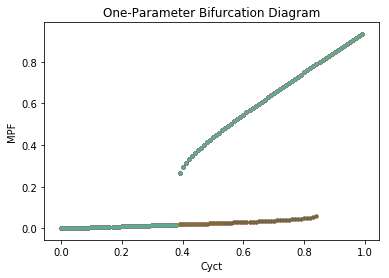

In [71]:
# changing the value of Cyct
Cyct = np.arange(0,1,0.01)
# define time point
t1 = np.linspace(0,50,5000)
# use a list to store output value of MPF
MPF_list = []

# at different Cyct condition, call odeint
for y0 in range(len(Cyct)):
    y = np.random.rand(1)
    for cy in Cyct:
        y2 = odeint(switch,y,t1,args=(cy,))
        MPF_list.append(y2[-1][-1])

# plot figure of MPF and Cyct
plt.figure()
for a in range(len(Cyct)):
    plt.scatter(Cyct,MPF_list[a*100:(a+1)*100], alpha = 0.4, marker = '.')
plt.xlabel('Cyct')
plt.ylabel('MPF')
plt.title('One-Parameter Bifurcation Diagram')
plt.show()

In [6]:
# define a function changing the number of phosphorylations of the last (inactive form of Cdc25)/(active form of Wee1).
def phosphorylation(y,t,θc,θw,nc,nw,Cyct):
    
    # define parameters     
    # protein phosphatases with constant activity PP.
    PP = 1
    
    # Rate of MPF inactivation by inactive Wee1/Cdc25.
    kwee_1 = 0.05
    k25_1   = 0.05
    
    # Rate of MPF activation by inactive Wee1/Cdc25.
    kwee_2 = 1
    k25_2   = 1
    
    # Rate of Wee1/Cdc25 activation by PP.
    kawee = 0.2
    ki25    = 0.2
    
    # Rate of Wee1/Cdc25 inactivation by PP.
    kiwee = 1
    ka25  = 1
    
    # Total Cdc25/Wee1
    Cdc25t = 1
    Wee1t = 1     

    # concentration of activate Cdc25p.
    Cdc25p = Cdc25t - Cdc25t * (1 - (((ka25*y) / (ki25*PP))**(θc+1))) / (1 - (((ka25*y) / (ki25*PP))**(nc+1)))
    
    # concentration of activate Wee1.
    Wee1 = Wee1t * (1 - (((kiwee*y)/(kawee*PP)) ** (θw+1))) / (1-(((kiwee*y)/(kawee*PP))**(nw+1)))
    # rate functions of MPF activation and inactivation.
    V25 = k25_1 * (Cdc25t - Cdc25p) + k25_2 * Cdc25p
    Vwee = kwee_1 * (Wee1t - Wee1) + kwee_2 * Wee1
    
    # the changing rate of MPF.
    dydt = V25 * (Cyct-y) - Vwee*y
                                     
    return dydt    

### Changing Value of θ Plot:

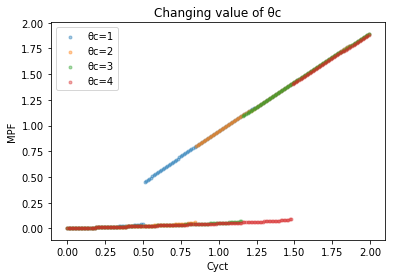

In [35]:
# define different value of Cyct
Cyct1 = np.arange(0,2, 0.01)
# difine time point
t2 = np.linspace(0,50,5000)
# changing the value of θc 
θc = np.arange(1,5,1)
# create a list to store output value of MPF with different θc
MPF_c = []

for c in θc:
    for cyc in Cyct1:
        # call odeint, changing the value of θc , θw keep unchange
        mpf1 = odeint(phosphorylation,0,t2,args=(c,2,5,5,cyc))
        MPF_c.append(mpf1[-1][-1])
    # plot the figure of MPF and Cyct with changing value of θc
    plt.scatter(Cyct1, MPF_c, label = 'θc='+ str(c), marker = '.',alpha=0.4)
    plt.legend(loc = 'best')
    MPF_c = []
plt.xlabel('Cyct')
plt.ylabel('MPF')
plt.title('Changing value of θc')
plt.show()

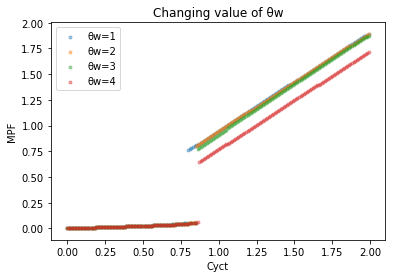

In [33]:
# changing the value of θw
θw = np.arange(1,5,1)
# create a list to store output value of MPF with different θw
MPF_w = []
for w in θw:
    for cyc in Cyct1:
        # changing the value of θw , θc keep unchange
        mpf2 = odeint(phosphorylation,0,t2,args=(2,w,5,5,cyc))
        MPF_w.append(mpf2[-1][-1])
    # plot the figure of MPF and Cyct with changing value of θw
    plt.scatter(Cyct1, MPF_w, label = 'θw='+ str(w), marker = '.', alpha = 0.4)
    plt.legend(loc = 'best')
    MPF_w = []
plt.xlabel('Cyct')
plt.ylabel('MPF')
plt.title('Changing value of θw')
plt.show()

### Changing Value of n Plot:

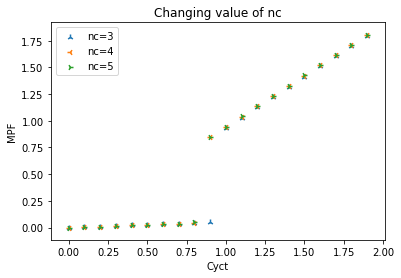

In [31]:
# define different value of Cyct
Cyct1 = np.arange(0,2, 0.1)
# difine time point
t2 = np.linspace(0,50,5000)
# changing the value of θc 
nc = np.arange(3,6,1)
# create a list to store output value of MPF with different θc
MPF_c = []

for c in nc:
    for cyc in Cyct1:
        # call odeint, changing the value of θc , θw keep unchange
        mpf1 = odeint(phosphorylation,0,t2,args=(2,2,c,5,cyc))
        MPF_c.append(mpf1[-1][-1])
    # plot the figure of MPF and Cyct with changing value of θc
    plt.scatter(Cyct1, MPF_c, label = 'nc='+ str(c), marker = str(c-1))
    plt.legend(loc = 'best')
    MPF_c = []
plt.xlabel('Cyct')
plt.ylabel('MPF')
plt.title('Changing value of nc')
plt.show()

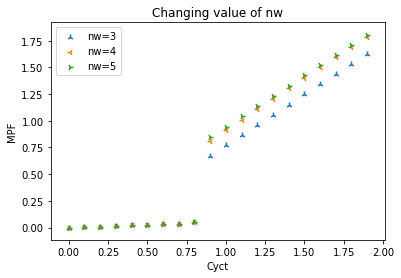

In [36]:
# define different value of Cyct
Cyct1 = np.arange(0,2, 0.1)
# difine time point
t2 = np.linspace(0,50,5000)
# changing the value of θc 
nc = np.arange(3,6,1)
# create a list to store output value of MPF with different θc
MPF_c = []

for c in nc:
    for cyc in Cyct1:
        # call odeint, changing the value of θc , θw keep unchange
        mpf1 = odeint(phosphorylation,0,t2,args=(2,2,5,c,cyc))
        MPF_c.append(mpf1[-1][-1])
    # plot the figure of MPF and Cyct with changing value of θc
    plt.scatter(Cyct1, MPF_c, label = 'nw='+ str(c), marker = str(c-1))
    plt.legend(loc = 'best')
    MPF_c = []
plt.xlabel('Cyct')
plt.ylabel('MPF')
plt.title('Changing value of nw')
plt.show()

### Linear Plot:

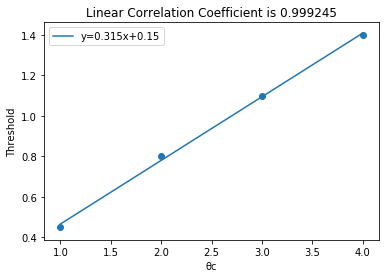

In [47]:
#set the value of threshold in a list
threshold=[0.45,0.80,1.10,1.40]

#set the θc
θc_co=[1,2,3,4]

#plot scatter and line
plt.scatter(θc_co,threshold)
y_line=[]
for n in θc_co:
    y_line.append(0.315*n+0.15)
plt.plot(θc_co,y_line,label='y=0.315x+0.15')

#title, label and legend
plt.xlabel('θc')
plt.ylabel('Threshold')
plt.title('Linear Correlation Coefficient is 0.999245')
plt.legend(loc='best')

#show
plt.show()